# Feature Selection

Feature selection and dimensionality reduction techniques are invaluable tools in machine learning, particularly when dealing with high-dimensional datasets or highly correlated features. By identifying the most informative features and discarding redundant or irrelevant ones, feature selection simplifies models, enhances interpretability, and mitigates the risk of overfitting. Similarly, dimensionality reduction transforms the original feature space into a lower-dimensional representation while preserving essential information, leading to faster training times, reduced computational costs, and improved model generalization. In the presence of highly correlated features, these techniques become even more crucial, as they help mitigate multicollinearity issues, stabilize parameter estimation, and uncover deeper insights into the underlying relationships within the data.

In many cases, a combination of both feature selection and dimensionality reduction techniques may be used to achieve the best results. For example, feature selection can be applied first to identify a subset of relevant features, followed by dimensionality reduction techniques to further compress the feature space while retaining important information.

From the Correlation Analysis performed during Exploratory Data Analysis, it could be concluded that there are many features with high correlation between them, therefore, feature selection and/or dimensionality reduction techniques may be necessary to address multicollinearity and improve interpretability.

This notebook will be dedicated to better understand which are the most significant features, and feature selection techniques and dimensionality reduction techniques will be explored.

- [Feature Importance Analysis](#feature-importance-analysis)
- [Feature Selection Methods](#feature-selection-methods)
- [Dimensionality reduction Methods](#dimensionality-reduction-methods)

## Feature Importance Analysis

Feature importance analysis is a critical aspect of understanding the relevance and influence of variables in predicting the target variable within a machine learning model. This analysis serves multiple purposes: it identifies key features, assists in the selection process to mitigate computational complexity, provides insights into the relationships between features and the target variable, and ultimately aids in explaining the model's behavior, facilitating informed decision-making.

In [1]:
import pickle
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt

from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
DATASET_PATH = '../outputs/processed_dataset.pkl'

### Loading preprocessed data

In [3]:
with open(DATASET_PATH, 'rb') as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

In [4]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.509751,0.600137,0.511635,0.553427,0.522879,0.600503,0.367246,0.389856,0.369367,0.329906,...,0.510337,0.578198,0.527581,0.529113,0.423103,0.731524,0.517305,0.679152,0.403221,0.356497
1,0.922115,0.755140,0.935250,0.974266,0.695072,0.939804,0.943107,0.957600,0.573738,0.546151,...,0.930590,0.726270,0.947281,0.927816,0.695501,0.896875,0.830596,0.993780,0.341844,0.650196
2,0.443599,0.401316,0.439216,0.483151,0.639595,0.471822,0.404918,0.409262,0.515209,0.461993,...,0.384434,0.357048,0.373841,0.406449,0.643833,0.585363,0.488605,0.603127,0.644578,0.557043
3,0.438034,0.632279,0.435001,0.483741,0.356918,0.489564,0.403963,0.304620,0.419818,0.360861,...,0.417248,0.571692,0.394476,0.441128,0.244177,0.566299,0.442496,0.439247,0.387873,0.393471
4,0.559552,0.920565,0.588617,0.609421,0.681020,0.845289,0.824182,0.684572,0.732989,0.641073,...,0.554412,0.896572,0.618741,0.564185,0.603909,0.973373,0.782927,0.900874,0.804119,0.946261


In [8]:
type(X_train)

pandas.core.frame.DataFrame

In [5]:
y_train.head()

476    0
82     1
292    0
407    0
562    1
Name: diagnosis, dtype: int64

In [7]:
type(y_train)

pandas.core.series.Series

### Feature importance Analysis

##### Random Forest Analysis

Let's explore the feature importance with a Random Forest Classifier. Random Forest (RF) calculates feature importance during training by considering how features contribute to the model's ability to make accurate predictions. Features that are important for making predictions are more likely to be selected for splitting nodes in the trees, leading to greater impurity decrease and higher feature importance scores.

Advantatges:
- Provides a direct measure of feature importance based on how much each feature contributes to reducing impurity in the decision trees of the forest.
- Robust to correlated features and capable of capturing non-linear relationships.

Considerations:
- Can be biased towards high-cardinality categorical variables or continuous variables with a large number of unique values.
- May not perform well with noisy data or when there are irrelevant features in the dataset.
- When evaluating feature importance, it is important to take into account that in Random Forests, highly correlated features may have their importance divided among them, leading to a decrease in the importance assigned to each individual feature. This happens because the trees in a Random Forest tend to split on the same or similar features when those features are highly correlated. As a result, the importance of one feature may overshadow the importance of the others, making it appear as if some features are less important than they actually are.

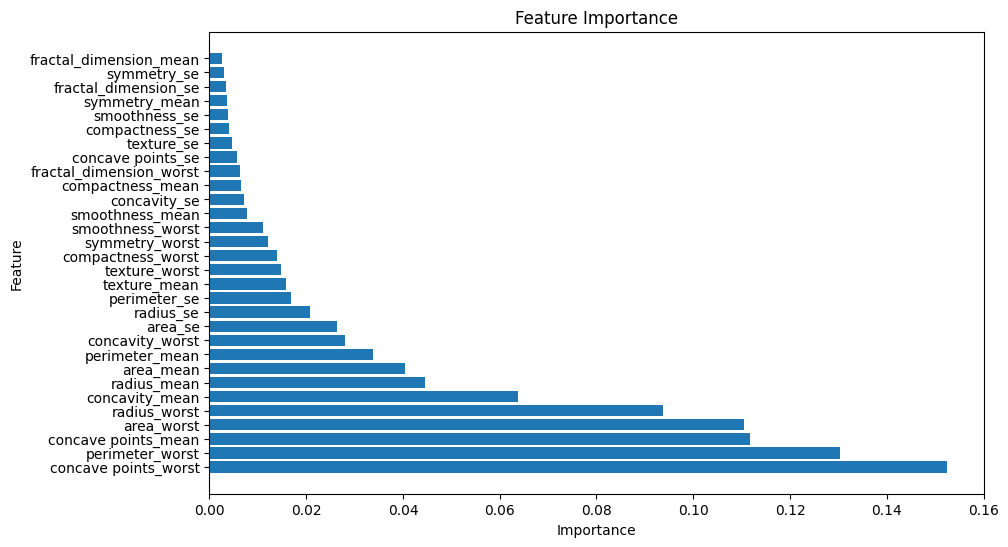

In [10]:
X = X_train.copy()
y = y_train.copy()

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns,
                                      'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance',
                                                          ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'],
         feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

As observed during the Correlation Analysis, the most significant features to determine the diagnosis are, in order of significance; *concave points_worst*, *perimeter_worst*,  *concave points_mean*, *area_worst* and *radius_worst*.

##### Permutation Feature Importance with RF

Let's now evaluate feature importance using a technique called Permutation feature importance. When computing permutation importance, the model's performance metric (e.g., accuracy, mean squared error) is evaluated before and after shuffling the values of a feature. The difference between these two performances indicates the importance of the feature: if shuffling the feature values leads to a significant decrease in performance, the feature is considered important. In this case the already trained Random Forest Classifier will serve as the model.

Advantages:
- Provides a model-agnostic measure of feature importance by evaluating the effect of shuffling each feature on model performance.
- Can handle any type of model and is not biased towards specific types of features.
- Reflects the impact of each feature on the specific model's performance.

Considerations:
- Computationally more expensive, especially for large datasets or complex models.
- May require more careful interpretation, especially when there are strong correlations between features. Permutation feature importance is less affected by correlation among features compared to Random Forest feature importance. Since permutation feature importance evaluates the effect of shuffling each feature on model performance, it directly measures the impact of each feature on the model's predictive performance, regardless of correlations. However, if two features are highly correlated, permuting one feature may have a similar effect on model performance as permuting the other, leading to similar or identical importance scores for both features.

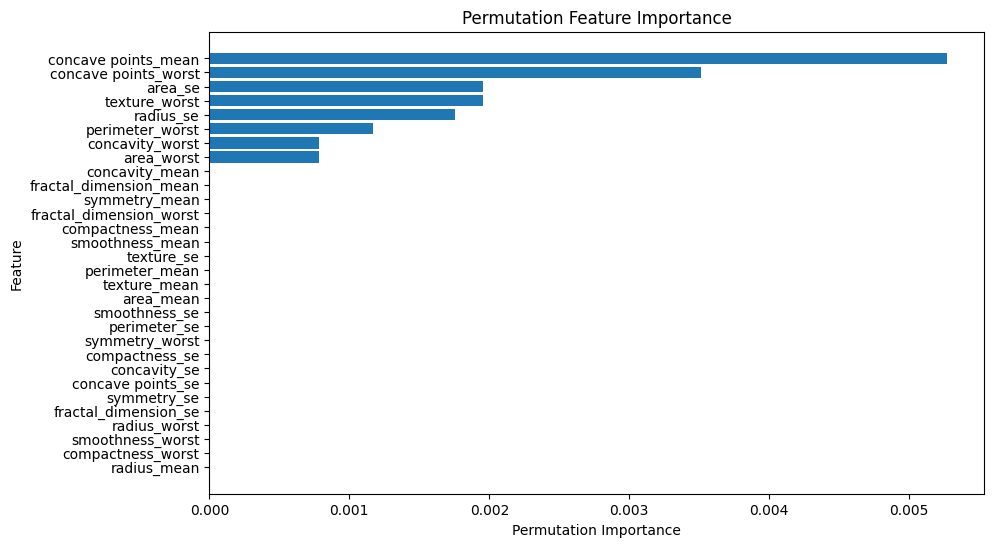

In [11]:
X = X_train.copy()
y = y_train.copy()

perm_importance = permutation_importance(rf_classifier,
                                         X,
                                         y,
                                         n_repeats=10,
                                         random_state=42)

feature_names = X.columns
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx],
         perm_importance.importances_mean[sorted_idx])
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance')
plt.show()

It seems that for the specific case of a Random Forest Classifier, the most significant variables are *concave points_mean*, *concave points_worst*, *area_se*, *texture_worst*, *radius_se*, *perimeter_worst*, *concavity_worst* and *area_worst*. 

A decision tree-based model like Random Forest may assign higher importance to certain features compared to a linear model like Logistic Regression. This difference arises because decision trees split the data based on feature values, making certain features more influential for prediction, whereas linear models estimate coefficients for each feature based on their relationship with the target variable. Let's redo the analysis using a logistic regression classifier. 

##### Logistic Regression

To perform feature importance analysis using Logistic Regression, the coefficients of the logistic regression model will serve as a measure of feature importance. Features with higher absolute coefficients are considered more important for predicting the target variable.

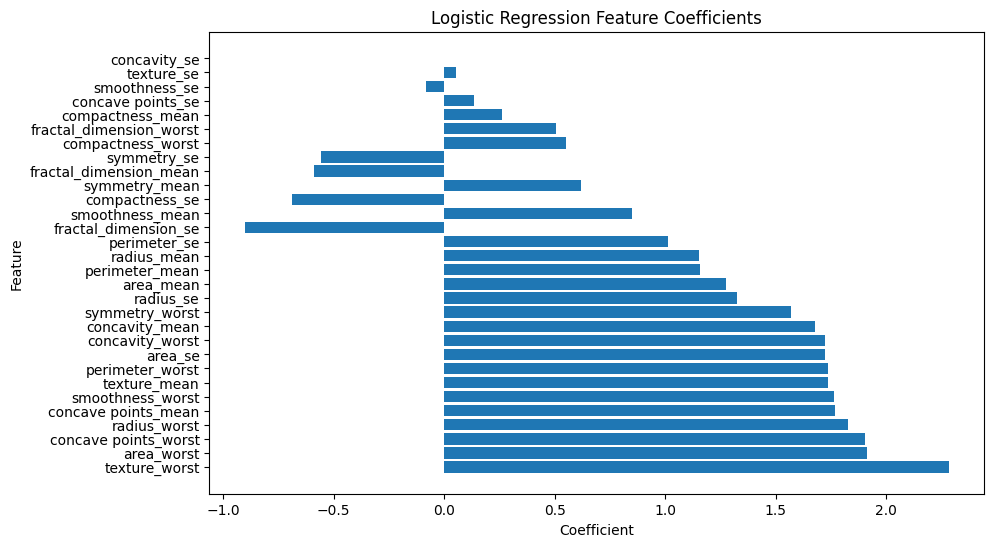

In [12]:
X = X_train.copy()
y = y_train.copy()

logreg_model = LogisticRegression()
logreg_model.fit(X, y)


feature_coeff = logreg_model.coef_[0]

# Create a DataFrame with feature names and their coefficients
feature_coeff_df = pd.DataFrame({'Feature': X.columns,
                                 'Coefficient': feature_coeff})

# Sort the DataFrame by absolute coefficient values
feature_coeff_df['Abs_Coefficient'] = abs(feature_coeff_df['Coefficient'])
feature_coeff_df = feature_coeff_df.sort_values(by='Abs_Coefficient',
                                                ascending=False)

# Plot feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_coeff_df['Feature'],
         feature_coeff_df['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Logistic Regression Feature Coefficients')
plt.show()

The variables with higher coefficients are *texture_worst*, *area_worst*, *concave points_worst*, *radius_worst*, *concave points_mean*, *smoothness_worst*, *texture_mean*, *perimeter_worst*, *area_se*, *concavity_worst*, *concavity_mean*, *radius_se* and *area_mean*.

##### Permutation Feature Importance on LR

Let's now use the permutation importance technique with our Logistic Regression Classifier. 

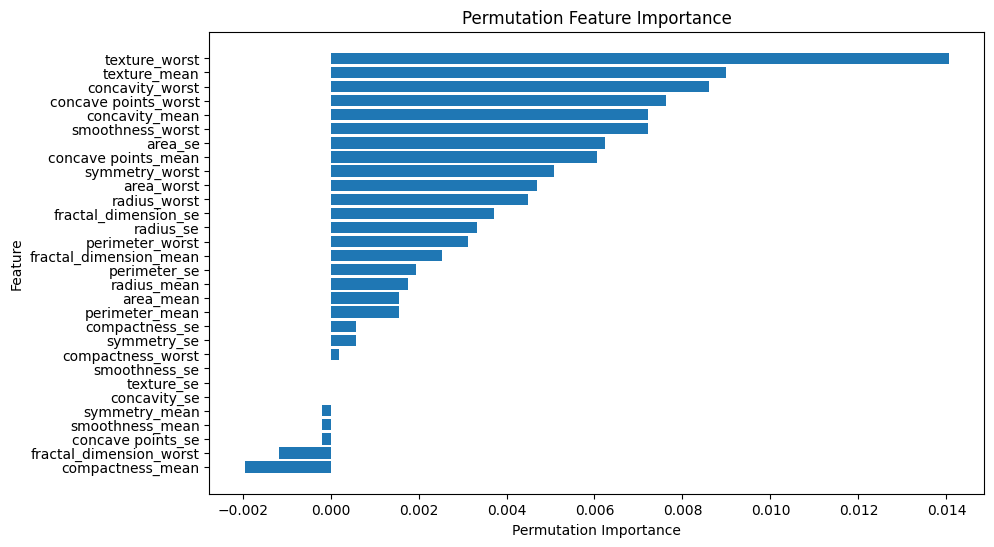

In [14]:
X = X_train.copy()
y = y_train.copy()

perm_importance = permutation_importance(logreg_model,
                                         X,
                                         y,
                                         n_repeats=10,
                                         random_state=42)

feature_names = X.columns
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx],
         perm_importance.importances_mean[sorted_idx])
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance')
plt.show()

It can be observed that for this type of classifier, there are more variables that contribute at model's predictions. From them, the most relevant ones are *texture_worst*, *texture_mean*, *concavity_worst*, *concave_points_worst*, *concavity_mean*, *smoothness_worst*, *area_se*, *concave_points_mean*, *symmetry_worst*, *area_worst* and *radius_worst*.

##### Feature Importance Conclusions

From the analysis, it seems that more or less the same variables appear as the most relevant. It is important to note that some of them are also highly correlated between eachother as seen in the Correlation Analysis during EDA.

The less significant variables that **could be excluded** during feature selection, are: **All SE variables** but *area_se* and *radius_se*, ***fractal_dimension_mean***, ***symmetry_mean***, ***compactness_mean***, ***smoothness_mean***, ***compactness_worst***, ***perimeter_mean***, ***area_mean***, **radius_mean** and ***fractal_dimension_worst***.

## Feature Selection methods

## Dimensionality reduction methods